# Logistic Regression 

#### Problem Statement: -

1.In this time and age of widespread internet usage, effective and targeted marketing plays a vital role. A marketing company would like to develop a strategy by analyzing its customer data. For this, data like age, location, time of activity, etc. have been collected to determine whether a user will click on an ad or not. Perform Logistic Regression on the given data to predict whether a user will click on an ad or not. 


Business Objective:: determine whether a user will click on an ad or not

In [84]:
import pandas as pd                                                          # Data Manipulation 
import numpy as np                                                           # Numeric Operation 
import matplotlib.pyplot as plt                                              # Data Visualization 
import seaborn as sns                                                        # Dada Visualization                                                          #
from sklearn.compose import ColumnTransformer                                # Column Transformer
from sklearn.pipeline import Pipeline                                        # To Create pipe line 
from sklearn.impute import SimpleImputer                                     # For simple Imputation 
from sklearn.preprocessing import MinMaxScaler                               # For Scalling 
from sklearn.preprocessing import OrdinalEncoder                              # For dummy variable creation 
from feature_engine.outliers import Winsorizer                               # For outlier Treatment 
from sklearn.model_selection import train_test_split                         # TO split the data 
import statsmodels.api as sm                                                 # Stats model 
from sklearn.metrics import r2_score                                         # matrixs for r2
import joblib                                                                # to save pipeline 
import pickle                                                                # to save model 
from sklearn import metrics                                                  # metrics 
from sklearn.metrics import confusion_matrix, accuracy_score                 # accuracy score 
from sklearn.metrics import roc_curve                                        # roc curve 
from sklearn.metrics import classification_report                            # for report 
from AutoClean import AutoClean                                              # For Auto Clean

In [6]:
# To Avoid Warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# import data
df = pd.read_csv("advertising.csv")
df.head()

,Daily_Time_ Spent _on_Site,Age,Area_Income,Daily Internet Usage,Ad_Topic_Line,City,Male,Country,Timestamp,Clicked_on_Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27-03-2016 00:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04-04-2016 01:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13-03-2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10-01-2016 02:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03-06-2016 03:36,0


In [5]:
# Stasticall Info 
df.describe()

,Daily_Time_ Spent _on_Site,Age,Area_Income,Daily Internet Usage,Male,Clicked_on_Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [7]:
# Information about data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Daily_Time_ Spent _on_Site  1000 non-null   float64
 1   Age                         1000 non-null   int64  
 2   Area_Income                 1000 non-null   float64
 3   Daily Internet Usage        1000 non-null   float64
 4   Ad_Topic_Line               1000 non-null   object 
 5   City                        1000 non-null   object 
 6   Male                        1000 non-null   int64  
 7   Country                     1000 non-null   object 
 8   Timestamp                   1000 non-null   object 
 9   Clicked_on_Ad               1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


As per problem statement we are going to take "Clicked_on_Ad" as a Output variable

In [21]:
# Segregation of Input and Output variable 
input_X = pd.DataFrame(df,columns=['Daily_Time_ Spent _on_Site','Age','Area_Income','Daily Internet Usage','Ad_Topic_Line','City','Male','Country','Timestamp'])
Output_Y = pd.DataFrame(df, columns=['Clicked_on_Ad'])

In [26]:
# Segregation of input variable into  Numeric and Category features 
input_Numeric = pd.DataFrame(input_X, columns=['Daily_Time_ Spent _on_Site','Age','Area_Income','Daily Internet Usage','Male'])
input_Category = pd.DataFrame(input_X, columns=['Ad_Topic_Line','City','Country','Timestamp'])

#### Expolratory Data analysis (EDA) / Descriptive Statistics

##### 1st Moment Business Decision (Measures of Central Tendency)

1.Mean

2.Median

3.Mode

In [28]:
# To Find Mean
input_Numeric.mean()

Daily_Time_ Spent _on_Site       65.00020
Age                              36.00900
Area_Income                   55000.00008
Daily Internet Usage            180.00010
Male                              0.48100
dtype: float64

In [29]:
# Middle value 
input_Numeric.median()

Daily_Time_ Spent _on_Site       68.215
Age                              35.000
Area_Income                   57012.300
Daily Internet Usage            183.130
Male                              0.000
dtype: float64

In [30]:
# Most Reapted values
input_Numeric.mode()

,Daily_Time_ Spent _on_Site,Age,Area_Income,Daily Internet Usage,Male
0,62.26,31.0,13996.50,113.53,0.0
1,75.55,NaN,14548.06,115.91,NaN
2,77.05,NaN,14775.50,117.30,NaN
3,78.76,NaN,15598.29,119.30,NaN
4,84.53,NaN,15879.10,120.06,NaN
...,...,...,...,...,...
995,NaN,NaN,78092.95,NaN,NaN
996,NaN,NaN,78119.50,NaN,NaN
997,NaN,NaN,78520.99,NaN,NaN
998,NaN,NaN,79332.33,NaN,NaN


##### 2nd Moment Business Decision (Measures of Dispersion)

1.Variance

2.Standard deviation

In [31]:
# Finding Variance (degree of spread)
input_Numeric.var()

Daily_Time_ Spent _on_Site    2.513371e+02
Age                           7.718611e+01
Area_Income                   1.799524e+08
Daily Internet Usage          1.927415e+03
Male                          2.498889e-01
dtype: float64

In [32]:
# Finding Standard Deviation 
input_Numeric.std()

Daily_Time_ Spent _on_Site       15.853615
Age                               8.785562
Area_Income                   13414.634022
Daily Internet Usage             43.902339
Male                              0.499889
dtype: float64

##### 3rd Business Moment Decision (Skewness)

Measure of asymmetry in the data distribution

In [33]:
# Finding Skewness (behavior of a distribution)(shape and distribution of data)
input_Numeric.skew()

Daily_Time_ Spent _on_Site   -0.371760
Age                           0.479142
Area_Income                  -0.650373
Daily Internet Usage         -0.033537
Male                          0.076169
dtype: float64

"Age" column is positive skewed [Mean > Median > Mode]

##### 4th Business Moment Decision (Kurtosis)

Measure of peakedness - represents the overall spread in the data

In [35]:
df.kurt()

Daily_Time_ Spent _on_Site   -1.095534
Age                          -0.400524
Area_Income                  -0.099810
Daily Internet Usage         -1.272659
Male                         -1.998199
Clicked_on_Ad                -2.004012
dtype: float64

### Data Cleaning 

In [36]:
input_Numeric.dtypes

Daily_Time_ Spent _on_Site    float64
Age                             int64
Area_Income                   float64
Daily Internet Usage          float64
Male                            int64
dtype: object

##### 1.Handling Null Values 

In [37]:
input_Numeric.isnull().sum()

Daily_Time_ Spent _on_Site    0
Age                           0
Area_Income                   0
Daily Internet Usage          0
Male                          0
dtype: int64

There is no null values 

#### 2.Outliers 

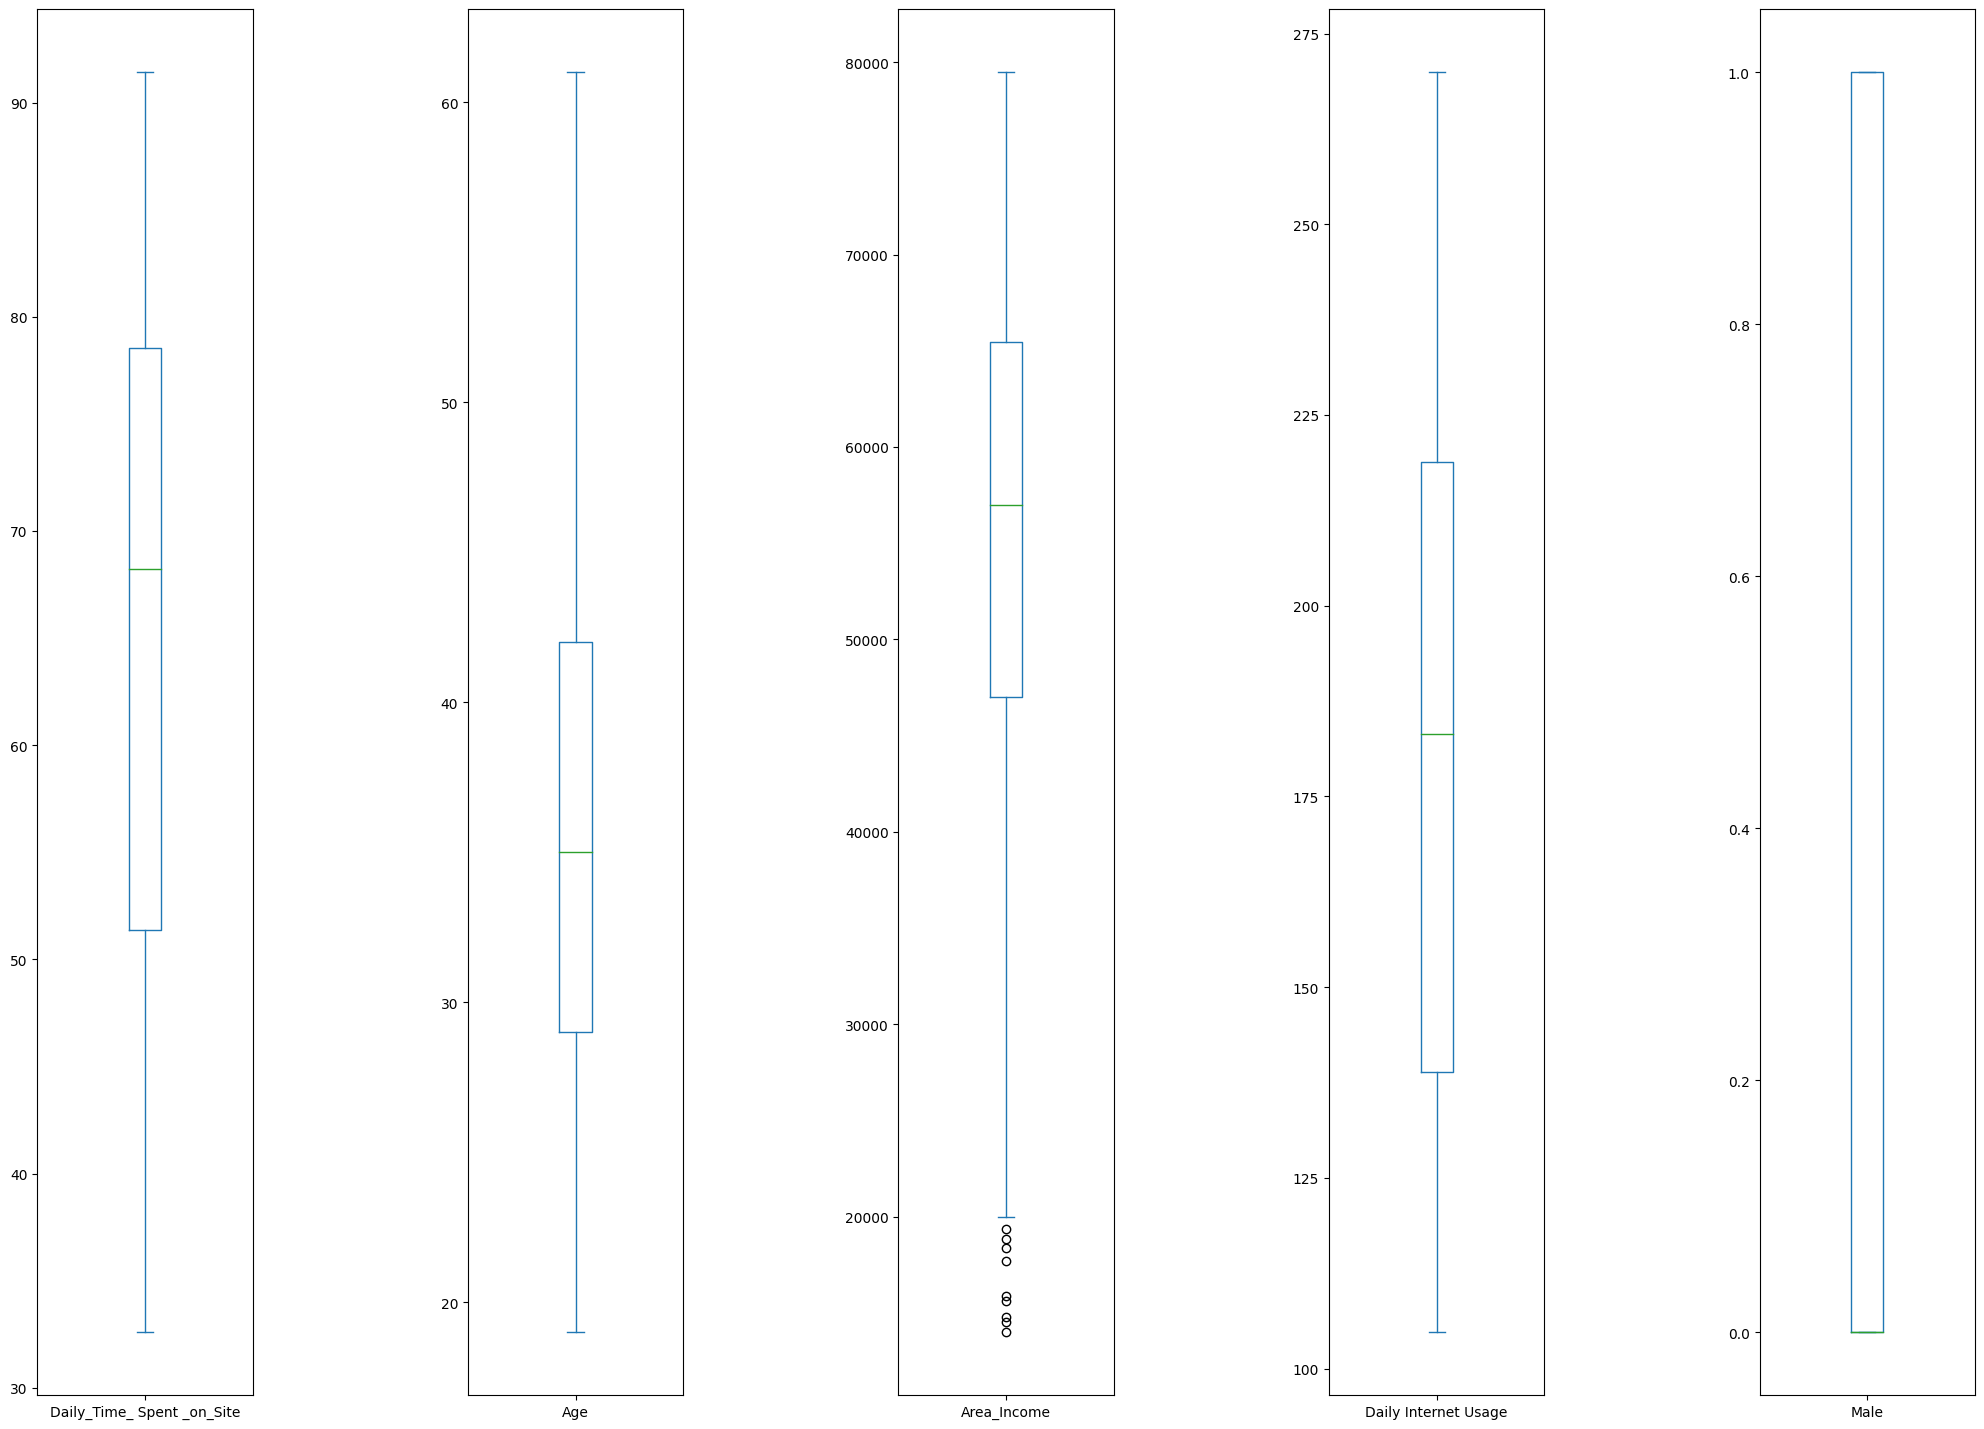

In [62]:
input_Numeric.plot(kind = 'box',    # Kind of plot is boxplot 
       subplots = True,             # Subplots Yes 
       sharey = False,              # share Y axis = False 
       figsize = (25, 18))          # figure size 
plt.subplots_adjust(wspace = 1)   # Space between box 
plt.show()

Outliers in "Area_Income" column

In [50]:
# Winsorization for outlier treatment
winsor = Winsorizer(capping_method = 'iqr', # choose  IQR rule boundaries or gaussian for mean and std
                          tail = 'both', # cap left, right or both tails 
                          fold = 1.5,
                          variables = list(input_Numeric.columns))
winsor

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['Daily_Time_ Spent _on_Site', 'Age', 'Area_Income',
                      'Daily Internet Usage', 'Male'])

In [53]:
# Fiting data 
clean = winsor.fit(input_Numeric)

In [54]:
# Save winsorizer model
joblib.dump(clean, 'winsor')

['winsor']

In [56]:
cleandata1 = pd.DataFrame(clean.transform(input_Numeric))#, columns = input_Numeric)

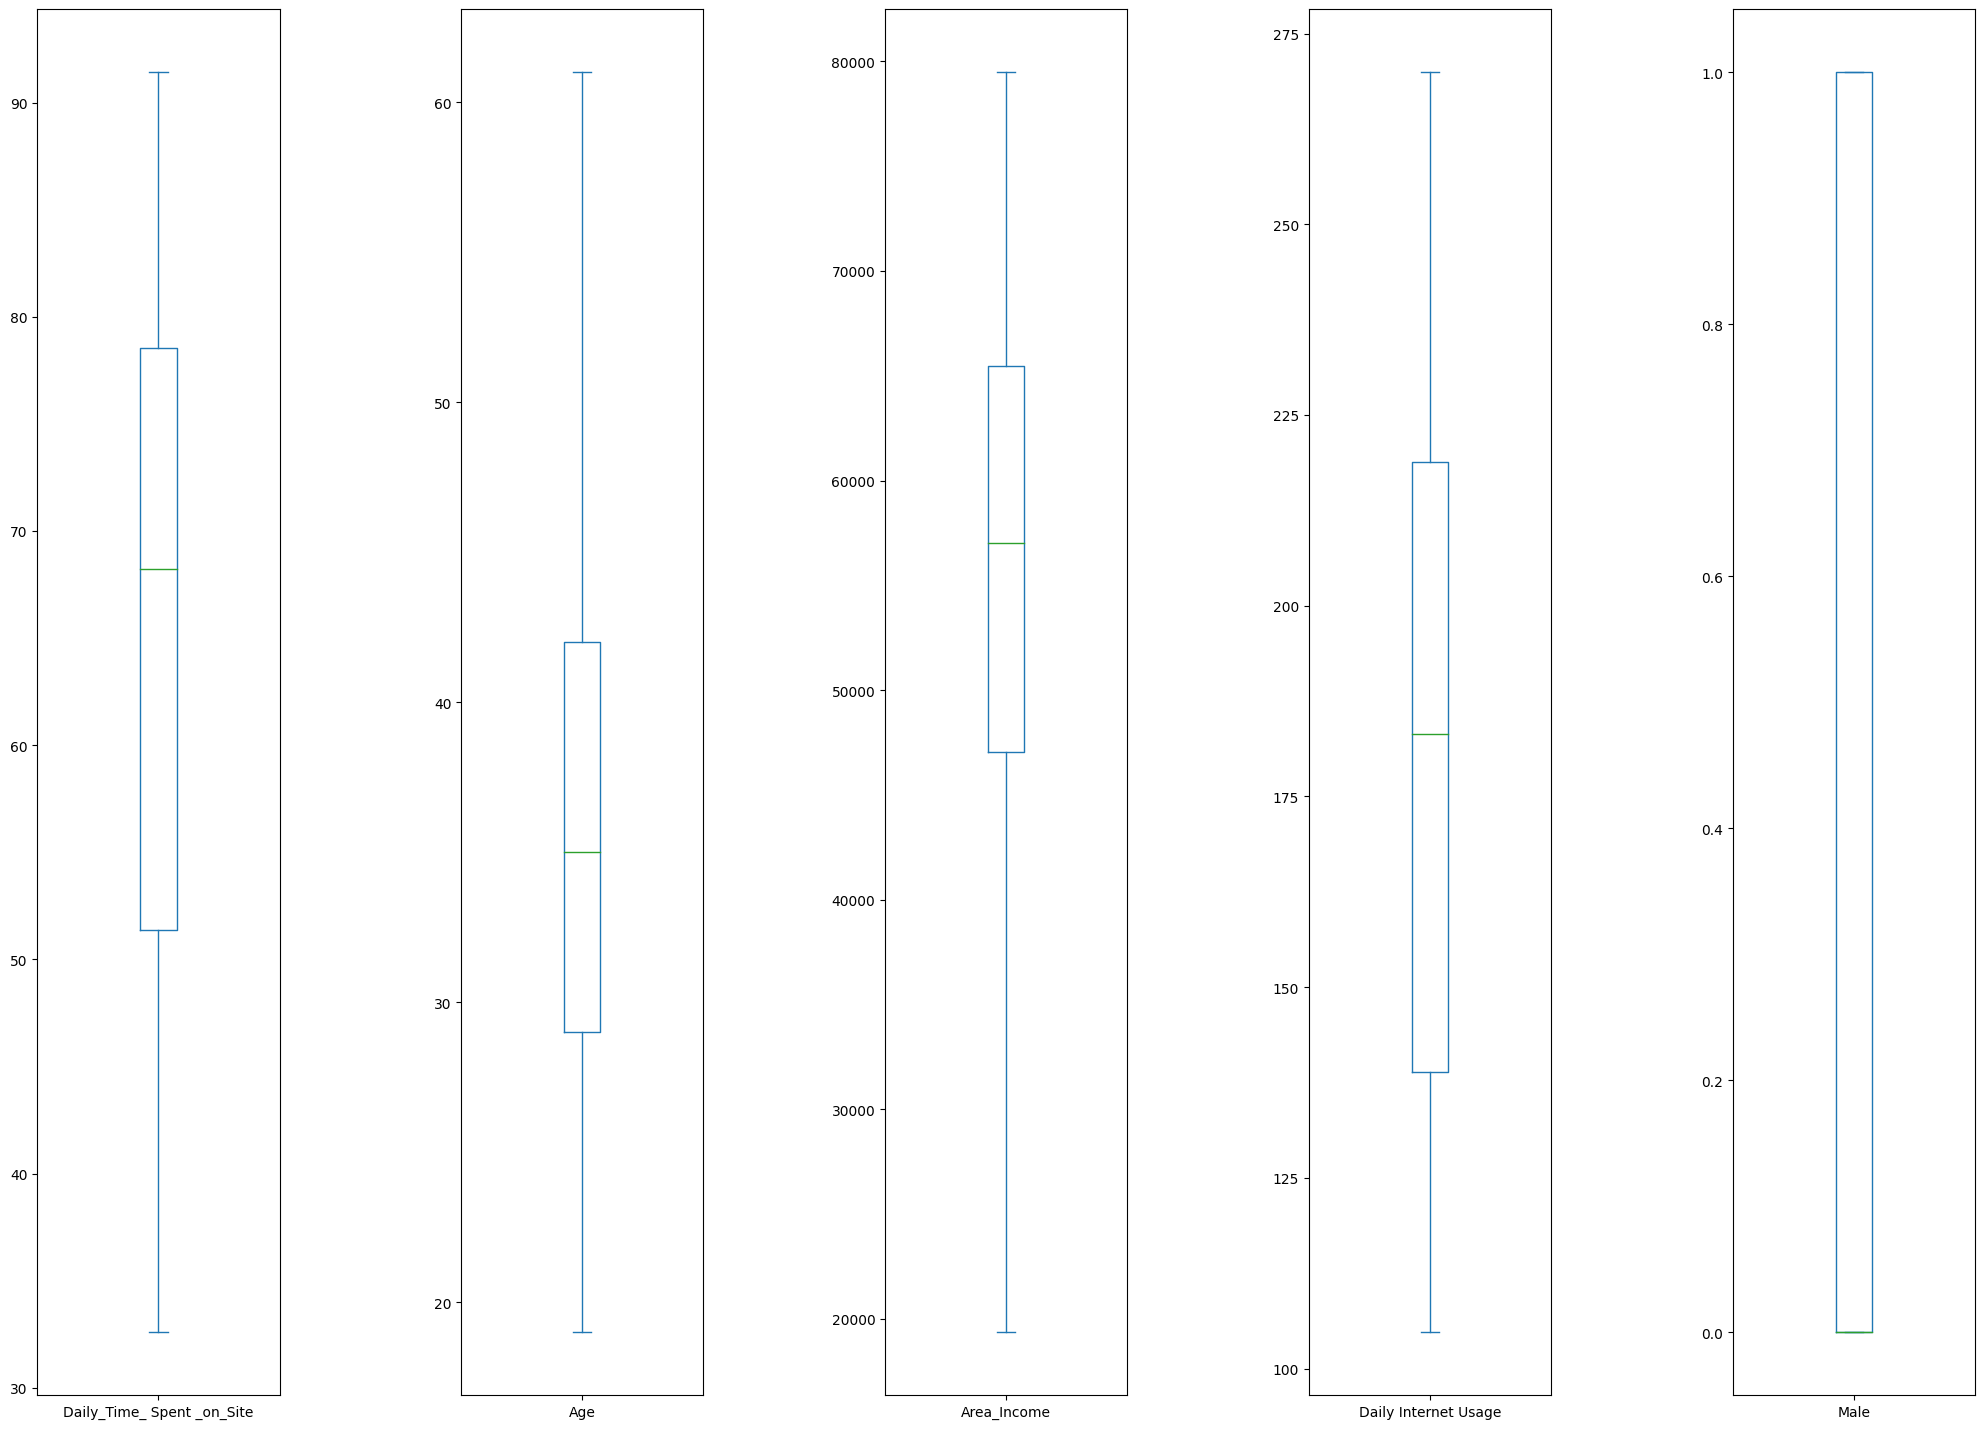

In [58]:
# Boxplot
cleandata1.plot(kind = 'box', subplots = True, sharey = False, figsize = (25, 18)) 
plt.subplots_adjust(wspace = 0.75) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show()

#### 4.Scaling 

In [70]:
# Segregating Numeric features
numeric_features = cleandata1.select_dtypes(exclude = ['object']).columns
print(numeric_features)

Index(['Daily_Time_ Spent _on_Site', 'Age', 'Area_Income',
       'Daily Internet Usage', 'Male'],
      dtype='object')


In [80]:
# Segregating Non-Numeric features
categorical_features = input_Category.select_dtypes(include = ['object']).columns
print(categorical_features)

Index(['Ad_Topic_Line', 'City', 'Country', 'Timestamp'], dtype='object')


In [71]:
# Creating Pipeline 
scale_pipeline = Pipeline([('scale', MinMaxScaler())])

In [72]:
scale_columntransfer = ColumnTransformer([('scale', scale_pipeline, numeric_features)]) # Skips the transformations for remaining columns
scale_columntransfer

ColumnTransformer(transformers=[('scale',
                                 Pipeline(steps=[('scale', MinMaxScaler())]),
                                 Index(['Daily_Time_ Spent _on_Site', 'Age', 'Area_Income',
       'Daily Internet Usage', 'Male'],
      dtype='object'))])

In [73]:
scale = scale_columntransfer.fit(input_Numeric)
scale

ColumnTransformer(transformers=[('scale',
                                 Pipeline(steps=[('scale', MinMaxScaler())]),
                                 Index(['Daily_Time_ Spent _on_Site', 'Age', 'Area_Income',
       'Daily Internet Usage', 'Male'],
      dtype='object'))])

In [74]:
# Save Minmax scaler pipeline model
joblib.dump(scale, 'minmax_Pipe')

['minmax_Pipe']

In [75]:
scaled_data = pd.DataFrame(scale.transform(input_Numeric), columns = numeric_features)
scaled_data.describe()

,Daily_Time_ Spent _on_Site,Age,Area_Income,Daily Internet Usage,Male
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.550743,0.404976,0.626119,0.455383,0.481000
std,0.269482,0.209180,0.204840,0.265785,0.499889
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.318885,0.238095,0.504446,0.206139,0.000000
50%,0.605388,0.380952,0.656847,0.474331,0.000000
75%,0.781022,0.547619,0.786005,0.690232,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


##### Encoding 

In [85]:
# Categorical features
encoding_pipeline = Pipeline([('onehot', OrdinalEncoder())])

In [86]:
preprocess_pipeline = ColumnTransformer([('categorical', encoding_pipeline, categorical_features)])

In [87]:
clean =  preprocess_pipeline.fit(input_Category)   # Works with categorical features only

In [88]:
# Save the encoding model
joblib.dump(clean, 'encoding_pipe')

['encoding_pipe']

In [89]:
encode_data = pd.DataFrame(clean.transform(input_Category))

In [90]:
# To get feature names for Categorical columns after Onehotencoding 
encode_data.columns = clean.get_feature_names_out(input_features = input_Category.columns)
encode_data.head()

,categorical__Ad_Topic_Line,categorical__City,categorical__Country,categorical__Timestamp
0,91.0,961.0,215.0,871.0
1,464.0,903.0,147.0,120.0
2,566.0,111.0,184.0,407.0
3,903.0,939.0,103.0,301.0
4,766.0,805.0,96.0,93.0


In [91]:
# Concating the Scaled data and encoded data 
clean_data = pd.concat([scaled_data, encode_data], axis = 1)  # concatenated data will have new sequential index
clean_data.head()

,Daily_Time_ Spent _on_Site,Age,Area_Income,Daily Internet Usage,Male,categorical__Ad_Topic_Line,categorical__City,categorical__Country,categorical__Timestamp
0,0.617882,0.380952,0.730472,0.916031,0.0,91.0,961.0,215.0,871.0
1,0.809621,0.285714,0.831375,0.538746,1.0,464.0,903.0,147.0,120.0
2,0.626721,0.166667,0.699200,0.797433,0.0,566.0,111.0,184.0,407.0
3,0.706272,0.238095,0.623160,0.854280,1.0,903.0,939.0,103.0,301.0
4,0.608023,0.380952,0.914568,0.731323,0.0,766.0,805.0,96.0,93.0


#### Model Building 

In [92]:
# Building the model and fitting the data
logit_model = sm.Logit(Output_Y, clean_data).fit()

Optimization terminated successfully.
         Current function value: 0.183548
         Iterations 8


In [93]:
pickle.dump(logit_model, open('logistic.pkl', 'wb'))

In [94]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Clicked_on_Ad   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            8
Date:                Wed, 30 Aug 2023   Pseudo R-squ.:                  0.7352
Time:                        00:04:12   Log-Likelihood:                -183.55
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                1.071e-214
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Daily_Time_ Spent _on_Site    -5.7597      0.629     -9.162      0.000      -6.992      -4.528
Age                            8.7590      0.798     10.981      0.000       7.196      10.322
Area_Income                   -1.4174      0.579     -2.447      0.014      -2.553      -0.282
Daily Internet Usage          -7.1616      0.691    -10.362      0.000      -8.516      -5.807
Male                           0.2589      0.278      0.933      0.351      -0.285       0.803
categorical__Ad_Topic_Line     0.0027      0.001      5.286      0.000       0.002       0.004
categorical__City              0.0018      0.000      3.636      0.000       0.001       0.003
categorical__Country           0.0067      0.002      3.350      0.001       0.003       0.011
categorical__Timestamp         0.0019      0.000      4.062      0.000       0.001       0.003
==============================================================================================
"""

In [95]:
logit_model.summary2() # for AIC

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
===========================================================================
Model:                 Logit               Pseudo R-squared:    0.735      
Dependent Variable:    Clicked_on_Ad       AIC:                 385.0960   
Date:                  2023-08-30 00:04    BIC:                 429.2658   
No. Observations:      1000                Log-Likelihood:      -183.55    
Df Model:              8                   LL-Null:             -693.15    
Df Residuals:          991                 LLR p-value:         1.0715e-214
Converged:             1.0000              Scale:               1.0000     
No. Iterations:        8.0000                                              
---------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
Daily_Time_ Spent _on_Site -5.7597   0.6287  -9.1616 0.0000 -6.9919 -4.5276
Age                         8.7590   0.7976  10.9811 0.0000  7.1957 10.3224
Area_Income                -1.4174   0.5793  -2.4468 0.0144 -2.5528 -0.2820
Daily Internet Usage       -7.1616   0.6911 -10.3621 0.0000 -8.5162 -5.8070
Male                        0.2589   0.2776   0.9325 0.3511 -0.2852  0.8030
categorical__Ad_Topic_Line  0.0027   0.0005   5.2858 0.0000  0.0017  0.0037
categorical__City           0.0018   0.0005   3.6357 0.0003  0.0008  0.0028
categorical__Country        0.0067   0.0020   3.3497 0.0008  0.0028  0.0106
categorical__Timestamp      0.0019   0.0005   4.0617 0.0000  0.0010  0.0029
===========================================================================

"""

In [96]:
# Prediction
pred = logit_model.predict(clean_data)
pred  # Probabilities

0      0.061130
1      0.054445
2      0.005929
3      0.034092
4      0.085183
         ...   
995    0.010543
996    0.991789
997    0.998968
998    0.270676
999    0.737356
Length: 1000, dtype: float64

In [99]:
# ROC Curve to identify the appropriate cutoff value
fpr, tpr, thresholds = roc_curve(Output_Y.Clicked_on_Ad, pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.48843331138147184

In [100]:
auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % auc)

Area under the ROC curve : 0.977616


In [103]:
# Filling all the cells with zeroes
clean_data["pred"] = np.zeros(1000)

In [105]:
# taking threshold value and above the prob value will be treated as correct value 
clean_data.loc[pred > optimal_threshold, "pred"] = 1

In [106]:
# Confusion Matrix
confusion_matrix(clean_data.pred, Output_Y.Clicked_on_Ad)

array([[483,  45],
       [ 17, 455]], dtype=int64)

In [108]:
# Accuracy 
print('Test accuracy = ', accuracy_score(clean_data.pred, Output_Y.Clicked_on_Ad))

Test accuracy =  0.938


In [109]:
# Classification report
classification = classification_report(clean_data["pred"], Output_Y)
print(classification)

              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94       528
         1.0       0.91      0.96      0.94       472

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



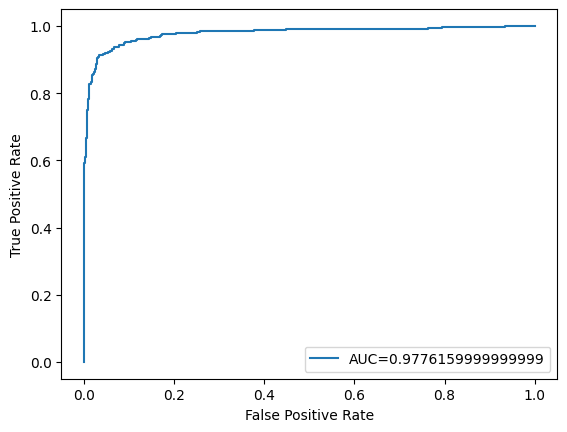

In [110]:
### PLOT FOR ROC
plt.plot(fpr, tpr, label = "AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 4)
plt.show()

In [116]:
x_train, x_test, y_train, y_test = train_test_split (clean_data.iloc[:, :9], Output_Y, 
                                                     test_size = 0.2, 
                                                     random_state = 0,
                                                     stratify = Output_Y)

In [118]:
# Fitting Logistic Regression to the training set  
logisticmodel = sm.Logit(y_train, x_train).fit()

Optimization terminated successfully.
         Current function value: 0.155330
         Iterations 9


In [119]:
# Evaluate on train data
y_pred_train = logisticmodel.predict(x_train)  
y_pred_train

600    0.977972
737    0.998022
33     0.099100
519    0.999255
341    0.989769
         ...   
622    0.999943
682    0.996302
357    0.998263
918    0.122482
342    0.014042
Length: 800, dtype: float64

In [121]:
# Metrics
# Filling all the cells with zeroes
y_train["pred"] = np.zeros(800)

In [122]:
# taking threshold value and above the prob value will be treated as correct value 
y_train.loc[pred > optimal_threshold, "pred"] = 1

In [123]:
auc = metrics.roc_auc_score(y_train["Clicked_on_Ad"], y_pred_train)
print("Area under the ROC curve : %f" % auc)

Area under the ROC curve : 0.983325


In [124]:
classification_train = classification_report(y_train["pred"], y_train["Clicked_on_Ad"])
print(classification_train)

              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       420
         1.0       0.92      0.97      0.95       380

    accuracy                           0.95       800
   macro avg       0.95      0.95      0.95       800
weighted avg       0.95      0.95      0.95       800



In [125]:
# confusion matrix 
confusion_matrix(y_train["pred"], y_train["Clicked_on_Ad"])


array([[389,  31],
       [ 11, 369]], dtype=int64)

In [126]:
# Accuracy score of the model
print('Train accuracy = ', accuracy_score(y_train["pred"], y_train["Clicked_on_Ad"]))

Train accuracy =  0.9475


In [127]:
# Validate on Test data
y_pred_test = logisticmodel.predict(x_test)  
y_pred_test

486    0.503641
178    0.951043
368    0.057082
360    0.996877
422    0.995611
         ...   
852    0.997905
352    0.059463
347    0.999763
481    0.021145
349    0.125459
Length: 200, dtype: float64

In [129]:
# Filling all the cells with zeroes
y_test["y_pred_test"] = np.zeros(200)

In [130]:
# Capturing the prediction binary values
y_test.loc[y_pred_test > optimal_threshold, "y_pred_test"] = 1

In [132]:
# classification report
classification1 = classification_report(y_test["y_pred_test"], y_test["Clicked_on_Ad"])
print(classification1)

              precision    recall  f1-score   support

         0.0       0.94      0.87      0.90       108
         1.0       0.86      0.93      0.90        92

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



In [133]:
# confusion matrix 
confusion_matrix(y_test["y_pred_test"], y_test["Clicked_on_Ad"])

array([[94, 14],
       [ 6, 86]], dtype=int64)

In [134]:
# Accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test["y_pred_test"], y_test["Clicked_on_Ad"]))

Test accuracy =  0.9
